# Funding Heavy Traffic Indicators on I-94

In these project we're going to analyze a dataset about the westbound traffic on the I-92 Interstate highway.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94.These indicators can be weather type,time of the day,time of week,etc.For instance,we may find out the traffic is usually heavier in the summer or when it snows.


## *The I-94 Traffic Dataset*

In [34]:
import pandas as pd
data=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(data.head(5) #Examing the first five rows
      ,data.tail(5)#Examing the last five rows
     )
data.info() #Get information about dataframe

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918         holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

We can notice thet date_time column is represented as a string so we have to convert it in order to use it.

All the rows don't have any null values .

A station located approximately midway between Minneapolis and Saint Paul records the traffic data (see the dataset documentation). For this station, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of the station. In other words, we should avoid generalizing our results for the entire I-94 highway.


## *Analyzing Traffic Volume*

We're going to start our analysis by examining the distribution of the traffic_volume column.


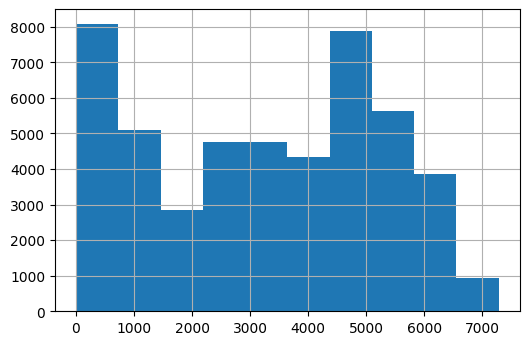

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
data['traffic_volume'].hist()


We can see that most value are located on the intervals [0,500] and [4500,5000]


In [41]:
data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

## *traffic Volume :Day vs. Night*

We'll start by dividing the dataset into two parts:

Daytime data: hours from 7 AM to 7 PM (12 hours)
Nighttime data: hours from 7 PM to 7 AM (12 hours)
While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [42]:
data['date_time']=pd.to_datetime(data['date_time'])
hours=data['date_time'].dt.hour
print(hours)
data['date_time'] = pd.to_datetime(data['date_time'])

day = data.copy()[(data['date_time'].dt.hour >= 7) & (data['date_time'].dt.hour < 19)]
print(day.shape)

night = data.copy()[(data['date_time'].dt.hour >= 19) | (data['date_time'].dt.hour < 7)]
print(night.shape)

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64
(23877, 9)
(24327, 9)


This significant difference in row numbers between day and night is due to a few hours of missing data. For instance, if you look at rows 176 and 177 (data.iloc[176:178]), you'll notice there's no data for two hours (4 and 5).

About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
About 25% of the time, the traffic volume was four times as much (4,933 cars or more).
This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)
While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

We will start by converting the date_time to datime

In [57]:
data['date_time']=pd.to_datetime(data['date_time'])
day = data.copy()[(data['date_time'].dt.hour >= 7) & (data['date_time'].dt.hour < 19)]
print(day.shape)

night = data.copy()[(data['date_time'].dt.hour >= 19) | (data['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


We will compare the traffic volume at night and during day ,by ploting a histogramme

<function matplotlib.pyplot.show(*args, **kw)>

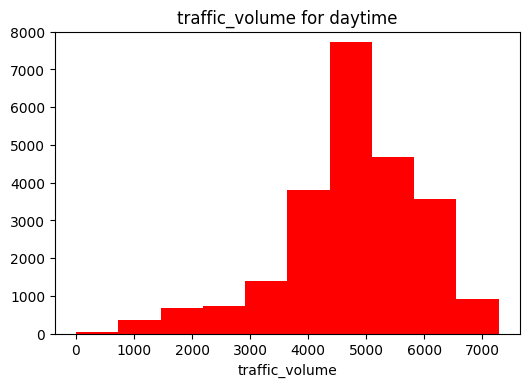

In [76]:
plt.figure()
plt.hist(day['traffic_volume'],color='red')
plt.xlabel('traffic_volume')
plt.title('traffic_volume for day time')
plt.ylim([0,8000])
plt.title('traffic_volume for daytime')
plt.show

We can tell that the traffic volume during the day time follow a left skwed(increase).

<function matplotlib.pyplot.show(*args, **kw)>

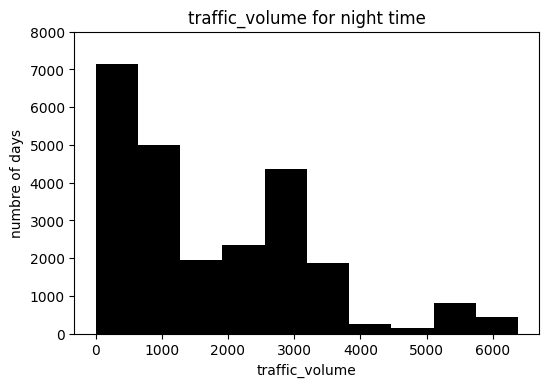

In [77]:
plt.hist(night['traffic_volume'],color='black')
plt.ylabel('numbre of days')
plt.xlabel('traffic_volume')
plt.title('traffic_volume for night time')
plt.ylim([0,8000])
plt.show


We can tell that the histogramme for the night time is a right skwed(it decsreases).

In [78]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [79]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

We can say that the traffic during the day timeis more heavy than the traffic during the night time.Beacause, if we say the two histograms we can see that :during day timethe more the volume increase the more the number of days  increase, and vice-versa .Which isn't the inverse for the night time. 


 we determined that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

Month

Day of the week

Time of day

In [81]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

we can generte a line plot so as to visualize how the trrafic volume changed each month 
on average

Text(0.5, 1.0, 'traffic_volume for datetime Vs months')

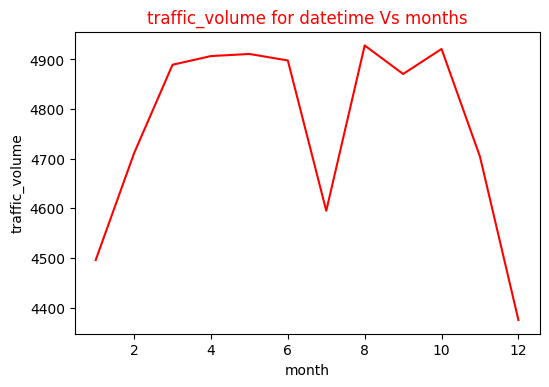

In [98]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],by_month['traffic_volume'],color='red')
plt.xlabel('month')
plt.ylabel('traffic_volume')
plt.title('traffic_volume for datetime Vs months',color='red')

It's increase from 1 to 3 theen  it's remain constante.Then  it's decreases from 11 to 12.But , we can notice that the traffic decreased  all of a sudden it's maybe because of a constructions during May.


In the previous part , we generated a line plot showing how the traffic volume changed each month on average.

We'll now continue with building line plots for another time unit: day of the week.

In [99]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

Text(0.5, 1.0, 'traffic_volume for datetime Vs days of the week')

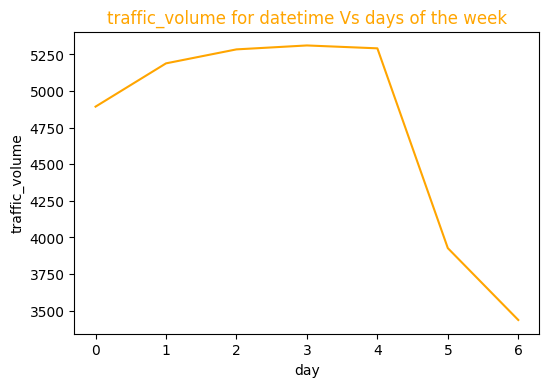

In [105]:
plt.plot([0,1,2,3,4,5,6],by_dayofweek['traffic_volume'],color='orange')
plt.xlabel('day')
plt.ylabel('traffic_volume')
plt.title('traffic_volume for datetime Vs days of the week',color='orange')

During the *business days* from 0 to 4 the traffic_volume remain hight and constante ,but there is a sudden decrease in the *weekend* .It can be explained by the hight number of person who use this road to get to their offices. 

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [106]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


Text(0.5, 1.0, 'The traffic volume Vs time of day for business days')

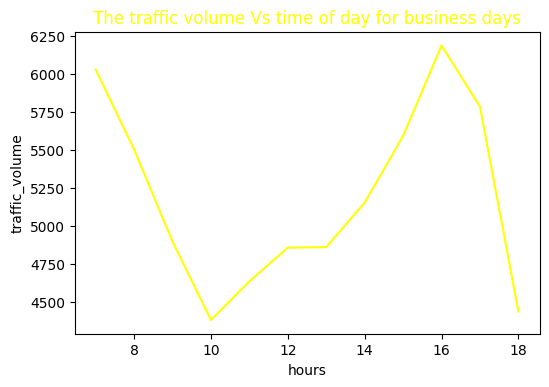

In [109]:
plt.plot([7,8,9,10,11,12,13,14,15,16,17,18],by_hour_business['traffic_volume'],color='yellow')
plt.xlabel('hours')
plt.ylabel('traffic_volume')
plt.title('The traffic volume Vs time of day for business days',color='yellow')

From 7 to 10 the traffic_volume descrease then it is encrease slowly untill 16 then it is start decreasing untill 18.We can see that it's related to the officers who are getting to there offices during the time work (work in USA start at  9:00 a.m. to 5:00 p.m)

(4250.0, 6250.0)

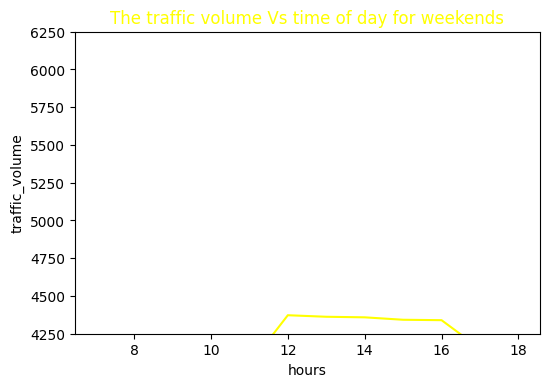

In [112]:
plt.plot([7,8,9,10,11,12,13,14,15,16,17,18],by_hour_weekend['traffic_volume'],color='yellow')
plt.xlabel('hours')
plt.ylabel('traffic_volume')
plt.title('The traffic volume Vs time of day for weekends',color='yellow')
plt.ylim([4250,6250])

During the weekends we can see that the plage of hours[11,15] is the only periode when we can notice a significante traffic_volume.But ,it's remain very small compared to the values of volume traffic during business days. 

Since we are only interrested to heavy traffic then we will limite our analyse to the business days.


So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusions:

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to weekends.
On business days, the rush hours are around 7 and 16.
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


The numeric ones are:
rain_1h,
snow_1h,
clouds_all,
temp.


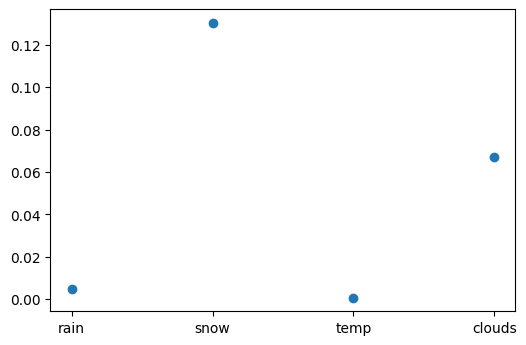

In [131]:
rain=data['traffic_volume'].corr(data['rain_1h'])
temp=data['traffic_volume'].corr(data['snow_1h'])
snow=data['traffic_volume'].corr(data['temp'])
clouds=data['traffic_volume'].corr(data['clouds_all'])
plt.scatter(['rain','snow','temp','clouds'],[rain,snow,temp,clouds])

We can see that the snow_1h has the strongest correslation with traffic_volume.Since the correlation coefficient of the rain_1h and the clouds_all is equal to 0 so what ever the wether taling about rain and clouds the traffic_violume is constante so it doesn't depend on those .But, for the temp and snow_1h this is not the case.So , the traffic_volume depends on the temperature and snow.

reviously, we examined the correlation between traffic_volume and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

We're going to calculate the average traffic volume associated with each unique value in these two columns. we grouped the data by weather_main and weather_description while using the mean as an aggregate function.

In [157]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()
by_weather_main.info


<bound method DataFrame.info of                     temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
weather_main                                                               
Clear         283.812078  0.000000  0.000000    1.670265     4778.416260   
Clouds        282.929274  0.000000  0.000000   62.667548     4865.415996   
Drizzle       284.456433  0.170804  0.000000   84.704417     4837.212911   
Fog           277.579641  0.163840  0.001409   65.477901     4372.491713   
Haze          275.319353  0.040036  0.000000   64.000000     4609.893285   
Mist          279.420825  0.249992  0.000825   74.961435     4623.976475   
Rain          287.089601  3.972943  0.000292   75.870116     4815.568462   
Smoke         292.405833  0.878333  0.000000   53.333333     4564.583333   
Snow          267.984505  0.014017  0.001768   80.501376     4396.321183   
Squall        296.730000  1.020000  0.000000   75.000000     4211.000000   
Thunderstorm  293.364678  1.146475  0.000000   75.184035

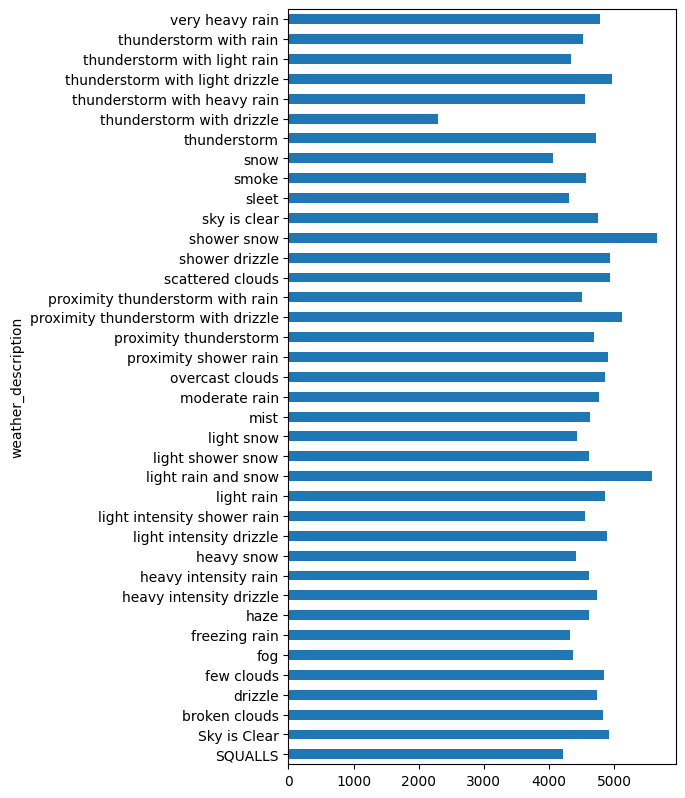

In [166]:
plt.barh(by_weather_main['traffic_volume'])



It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.

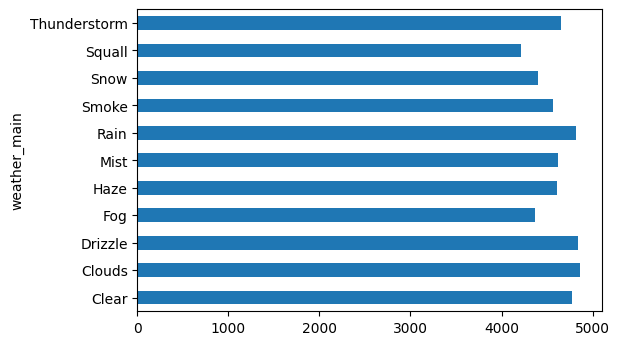

In [168]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

Shower snow
Light rain and snow
Proximity thunderstorm with drizzle
It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.



## Conclusion:

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators
The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to the weekends.
On business days, the rush hours are around 7 and 16.
Weather indicators
Shower snow
Light rain and snow
Proximity thunderstorm with drizzle